In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xgcm
import warnings

#=================================================
# Modify paths to point to output files
#=================================================
# Case name (Straight Coast)
case_straight = 'Straight Coast'

# path to ocean_annual file
path_year_straight = '/data/sragen/aquaplanet/MASTERS/straight_coast/run/DATA/600yr/24000101.ocean_annual.nc'
dy_straight = xr.open_dataset(path_year_straight, decode_times=True)

# path to ocean_annual_rho2 file
path_rho2_straight = '/data/sragen/aquaplanet/MASTERS/straight_coast/run/DATA/600yr/24000101.ocean_annual_rho2.nc'
drho_straight = xr.open_dataset(path_rho2_straight, decode_times=True)

# path to ocean_annual_z file
path_z_straight = '/data/sragen/aquaplanet/MASTERS/straight_coast/run/DATA/600yr/24000101.ocean_annual_z.nc'
dz_straight = xr.open_dataset(path_z_straight, decode_times=True)



# Case name (Both Coast)
case_both = 'Both Coast'

# path to ocean_annual file
path_year_both = '/data/sragen/aquaplanet/MASTERS/both_coast/run/DATA/600yr/24000101.ocean_annual.nc'
dy_both = xr.open_dataset(path_year_both, decode_times=True)

# path to ocean_annual_rho2 file
path_rho2_both = '/data/sragen/aquaplanet/MASTERS/both_coast/run/DATA/600yr/24000101.ocean_annual_rho2.nc'
drho_both = xr.open_dataset(path_rho2_both, decode_times=True)

# path to ocean_annual_z file
path_z_both = '/data/sragen/aquaplanet/MASTERS/both_coast/run/DATA/600yr/24000101.ocean_annual_z.nc'
dz_both = xr.open_dataset(path_z_both, decode_times=True)



# Case name (Wide Straight)
case_wide = 'Wide Straight'

# path to ocean_annual file
path_year_wide = '/data/sragen/aquaplanet/MASTERS/wide_straight/run/DATA/600yr/24000101.ocean_annual.nc'
dy_wide = xr.open_dataset(path_year_wide, decode_times=True)

# path to ocean_annual_rho2 file
path_rho2_wide = '/data/sragen/aquaplanet/MASTERS/wide_straight/run/DATA/600yr/24000101.ocean_annual_rho2.nc'
drho_wide = xr.open_dataset(path_rho2_wide, decode_times=True)

# path to ocean_annual_z file
path_z_wide = '/data/sragen/aquaplanet/MASTERS/wide_straight/run/DATA/600yr/24000101.ocean_annual_z.nc'
dz_wide = xr.open_dataset(path_z_wide, decode_times=True)



# Case name (America Coast)
case_am = 'America Coast'

# path to ocean_annual file
path_year_am = '/data/sragen/aquaplanet/MASTERS/am_coast/run/DATA/600yr/24000101.ocean_annual.nc'
dy_am = xr.open_dataset(path_year_am, decode_times=True)

# path to ocean_annual_rho2 file
path_rho2_am = '/data/sragen/aquaplanet/MASTERS/am_coast/run/DATA/600yr/24000101.ocean_annual_rho2.nc'
drho_am = xr.open_dataset(path_rho2_am, decode_times=True)

# path to ocean_annual_z file
path_z_am = '/data/sragen/aquaplanet/MASTERS/am_coast/run/DATA/600yr/24000101.ocean_annual_z.nc'
dz_am = xr.open_dataset(path_z_am, decode_times=True)


# Case name (Africa Coast)
case_af = 'Africa Coast'

# path to ocean_annual file
path_year_af = '/data/sragen/aquaplanet/MASTERS/af_coast/run/DATA/500yr/23000101.ocean_annual.nc'
dy_af = xr.open_dataset(path_year_af, decode_times=True)

# path to ocean_annual_rho2 file
path_rho2_af = '/data/sragen/aquaplanet/MASTERS/af_coast/run/DATA/500yr/23000101.ocean_annual_rho2.nc'
drho_af = xr.open_dataset(path_rho2_af, decode_times=True)

# path to ocean_annual_z file
path_z_af = '/data/sragen/aquaplanet/MASTERS/af_coast/run/DATA/500yr/23000101.ocean_annual_z.nc'
dz_af = xr.open_dataset(path_z_af, decode_times=True)


#=================================================
# Ignore runtime warnings: mean of empty slice
#=================================================
warnings.filterwarnings("ignore", message="Mean of empty slice")

#=================================================
# Modify latitudes to point to western and eastern
# boundaries of small basin and northern extent of SO.
# Comment out for AQUA and RIDGE cases. 
#=================================================
x_west = np.where(dy_straight['xh']==211)[0][0]
x_east = np.where(dy_straight['xh']==351)[0][0]
y = np.where(dy_straight['yq']==-35)[0][0]
y_south = np.where(dy_straight['yq']==-71)[0][0]
y_north = np.where(dy_straight['yq']==71)[0][0]

#=================================================
# Make grid object for XGCM 
# #=================================================
# grid_straight = xgcm.Grid(dm_straight, coords={'x': {'center':'xq', 'left':'xh'}, 'y': {'center':'yq', 'left':'yh'}})


/home/sragen/.conda/envs/aqua/lib/python3.7/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


In [3]:
# umo_slice = dz_straight.umo.isel(time=slice(70,100)).mean(dim='time')/1030
# umo_sum = -umo_slice.sum(dim='z_l')

# umosum = umoslice = xr.concat([umo_sum.sel(xq=slice(209,360)), 
#                            umo_sum.sel(xq=slice(0,209))], dim='xq')

# cumsum = np.zeros_like(umosum)
# for row in range(umosum.shape[0]):
#     running_total = 0
#     for column in reversed(range(umosum.shape[1])):
#         if (umosum[row,column] == 0.0):
#             running_total = 0
#         else:
#             running_total += umosum[row,column]
#         cumsum[row, column] = running_total

# umoslice = xr.concat([umo_slice.isel(z_l=0).sel(xq=slice(209,360)), 
#                            umo_slice.isel(z_l=0).sel(xq=slice(0,209))], dim='xq')
# mask = np.isnan(umoslice)

# psi = np.where(mask==False, cumsum/1e6, np.nan)

# plt.subplots(figsize=(14,8))
# plt.contourf(umo_sum.xq, umo_sum.yh, psi, cmap='RdBu_r', levels=np.linspace(-1000,1000,21,endpoint=True), extend='both')
# # plt.contour(psi, colors='k', levels=np.linspace(-1000,1000,7,endpoint=True))
# # plt.plot([209,209], [-80,80], '--')
# plt.title('{} Barotropic Streamfunction'.format(case_straight), fontsize=16)
# plt.colorbar()

In [4]:
def barotropic_sfn(dataset):
    '''This function calculates the barotropic streamfunction. 
    The dataset input must be the ocean_annual_z.nc model output file.'''
    umo_slice = dataset.umo.isel(time=slice(70,100)).mean(dim='time')/1030
    umo_sum = -umo_slice.sum(dim='z_l')

    umosum = umoslice = xr.concat([umo_sum.sel(xq=slice(209,360)), 
                               umo_sum.sel(xq=slice(0,209))], dim='xq')

    cumsum = np.zeros_like(umosum)
    for row in range(umosum.shape[0]):
        running_total = 0
        for column in reversed(range(umosum.shape[1])):
            if (umosum[row,column] == 0.0):
                running_total = 0
            else:
                running_total += umosum[row,column]
            cumsum[row, column] = running_total

    umoslice = xr.concat([umo_slice.isel(z_l=0).sel(xq=slice(209,360)), 
                               umo_slice.isel(z_l=0).sel(xq=slice(0,209))], dim='xq')
    mask = np.isnan(umoslice)

    psi = np.where(mask==False, cumsum/1e6, np.nan)
    
    return(psi)



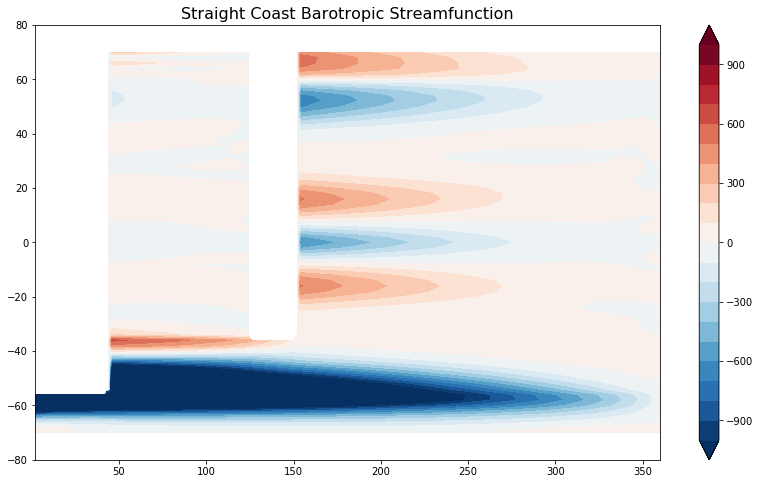

In [5]:
psi_straight = barotropic_sfn(dz_straight)

plt.subplots(figsize=(14,8))
plt.contourf(dz_straight.umo.xq, dz_straight.umo.yh, psi_straight, 
             cmap='RdBu_r', levels=np.linspace(-1000,1000,21,endpoint=True), extend='both')
plt.title('{} Barotropic Streamfunction'.format(case_straight), fontsize=16)
plt.colorbar()
plt.show()

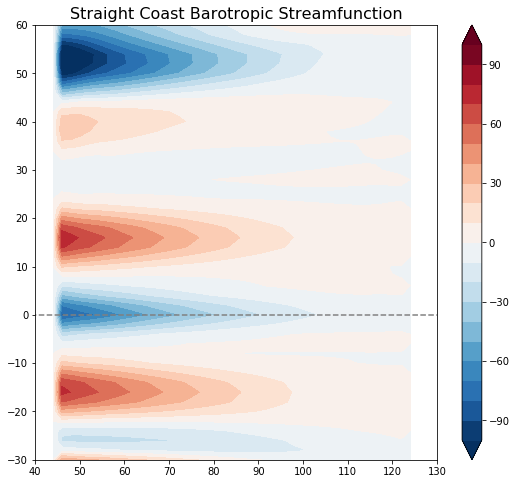

In [12]:
plt.subplots(figsize=(9,8))
plt.contourf(dz_straight.umo.xq, dz_straight.umo.yh, psi_straight, 
             cmap='RdBu_r', levels=np.linspace(-100,100,21,endpoint=True), extend='both')
plt.title('{} Barotropic Streamfunction'.format(case_straight), fontsize=16)
plt.colorbar()
plt.xlim([40,130]), plt.ylim([-30, 60])
plt.plot([30,150], [0,0], color='gray', linestyle='dashed')
plt.show()

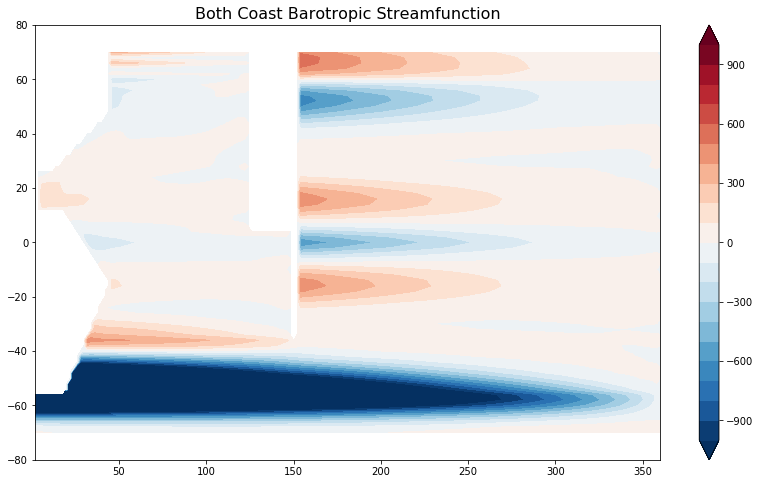

In [11]:
psi_both = barotropic_sfn(dz_both)

plt.subplots(figsize=(14,8))
plt.contourf(dz_both.umo.xq, dz_both.umo.yh, psi_both, 
             cmap='RdBu_r', levels=np.linspace(-1000,1000,21,endpoint=True), extend='both')
plt.title('{} Barotropic Streamfunction'.format(case_both), fontsize=16)
plt.colorbar()
plt.show()

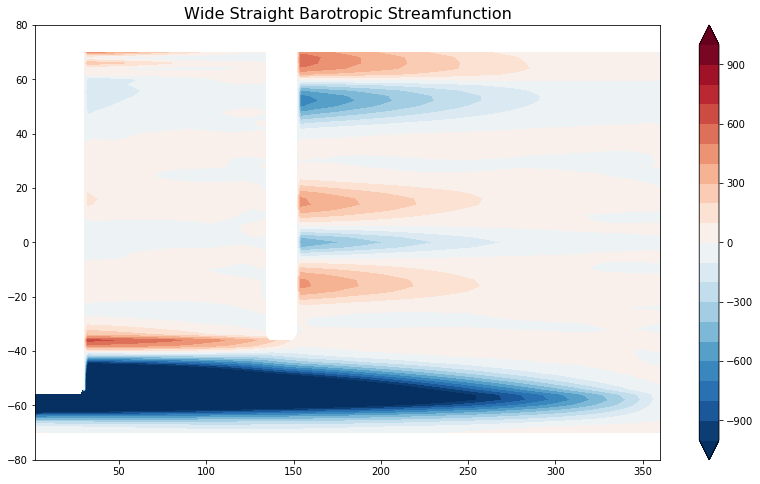

In [12]:
psi_wide = barotropic_sfn(dz_wide)

plt.subplots(figsize=(14,8))
plt.contourf(dz_wide.umo.xq, dz_wide.umo.yh, psi_wide, 
             cmap='RdBu_r', levels=np.linspace(-1000,1000,21,endpoint=True), extend='both')
plt.title('{} Barotropic Streamfunction'.format(case_wide), fontsize=16)
plt.colorbar()
plt.show()

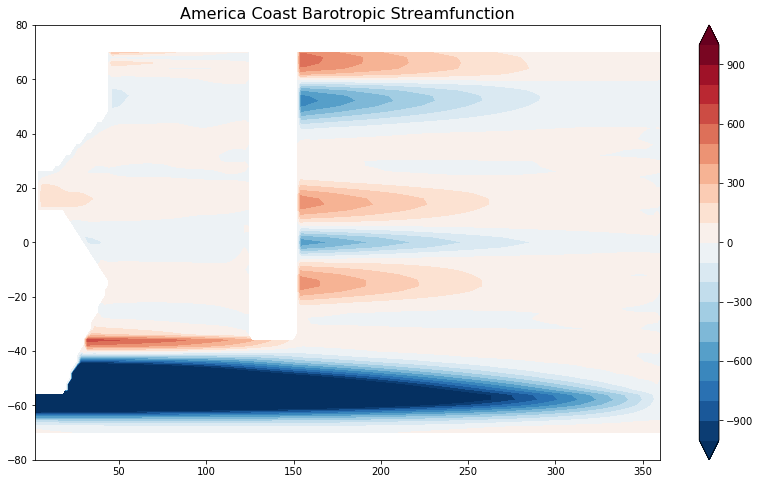

In [13]:
psi_am = barotropic_sfn(dz_am)

plt.subplots(figsize=(14,8))
plt.contourf(dz_am.umo.xq, dz_am.umo.yh, psi_am, 
             cmap='RdBu_r', levels=np.linspace(-1000,1000,21,endpoint=True), extend='both')
plt.title('{} Barotropic Streamfunction'.format(case_am), fontsize=16)
plt.colorbar()
plt.show()

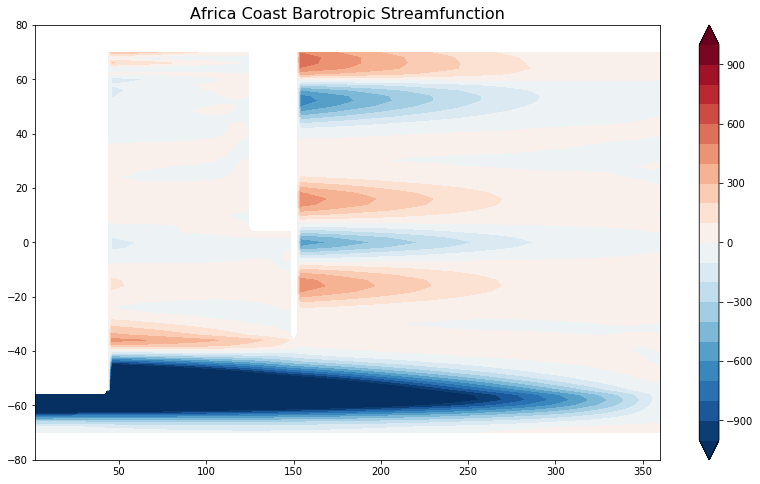

In [14]:
psi_af = barotropic_sfn(dz_af)

plt.subplots(figsize=(14,8))
plt.contourf(dz_af.umo.xq, dz_af.umo.yh, psi_af, 
             cmap='RdBu_r', levels=np.linspace(-1000,1000,21,endpoint=True), extend='both')
plt.title('{} Barotropic Streamfunction'.format(case_af), fontsize=16)
plt.colorbar()
plt.show()